<a href="https://colab.research.google.com/github/SeidaAhmed/An-application-of-Machine-Learning-to-COVID-19-data/blob/main/CIND850_Final_Starter_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
%cd drive/My Drive/

/content/drive/My Drive


In [22]:
import pandas as pd
import numpy as np
from numpy import hstack

import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import shift
from tensorflow.keras.utils  import to_categorical
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, GRU, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense


from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

<ipython-input-22-7ea7b07352c7>:6: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


In [7]:
def rmse(y_pred, y_real):
    return np.sqrt(np.sum((y_pred - y_real)**2)  / len(y_real))

# Question 1
Load the data file, “final_exam_text_data.csv” which contains 672 rows with two columns about consumer complaint narrative and the product it is related to.  The products have 5 different categories including ‘Debt Collection’, ‘Consumer Loan’, ‘Mortgage’, ‘Credit Card’ and ‘Student Loan’.


In [24]:
## Your code goes here

df=pd.read_csv('final_exam_text_data.csv')

**1.a)Tokenize the data using max features of size 10000 and pad the sequences to make length of 100. Finally, divide the data into 80/20 train test splits.**

In [25]:
## Your code goes here
max_features = 10000
max_len = 100


texts = df['consumer_complaint_narrative'].astype(str).tolist()
labels = df['product'].tolist()
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Encode product categories as numbers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)


# Padding
max_len = 100
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)











X_train shape: (537, 100)
X_test shape: (135, 100)


In [ ]:
## Your code goes here

**1.b)Train a 1D CNN model for group prediction task. Use above max_features and max_len values along with 128 dimensional embeddings in Embedding layer.**

Model architecture should contain following layers:

Conv1D(32, 7, activation='relu')

MaxPooling1D(5)

Conv1D(32, 7, activation='relu')

GlobalMaxPooling1D()

**Set your optimizer to RMSprop(lr=1e-4).
Train for 200 epochs with batch_size 128 and use a validation_split of 0.2 .**


In [27]:
## Your code goes here

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Conv1D(32, 7, activation='relu'),
    MaxPooling1D(5),
    Conv1D(32, 7, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(
    X_train, y_train_cat,
    epochs=200,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 480ms/step - accuracy: 0.0705 - loss: 1.6458 - val_accuracy: 0.0833 - val_loss: 1.6331
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.0847 - loss: 1.6269 - val_accuracy: 0.1204 - val_loss: 1.6230
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.2025 - loss: 1.6099 - val_accuracy: 0.2222 - val_loss: 1.6146
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.3503 - loss: 1.6021 - val_accuracy: 0.3148 - val_loss: 1.6071
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.4143 - loss: 1.5892 - val_accuracy: 0.3611 - val_loss: 1.6005
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4026 - loss: 1.5801 - val_accuracy: 0.3611 - val_loss: 1.5946
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.3886 - loss: 1.5727 - val_accuracy: 0.3611 - val_loss: 1.5885
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.3967 - loss: 1.5642 - val_accuracy: 0.3611 - val_lo

**1.b.i)Generate the validation loss/accuracy plots and select the best number of epochs.**


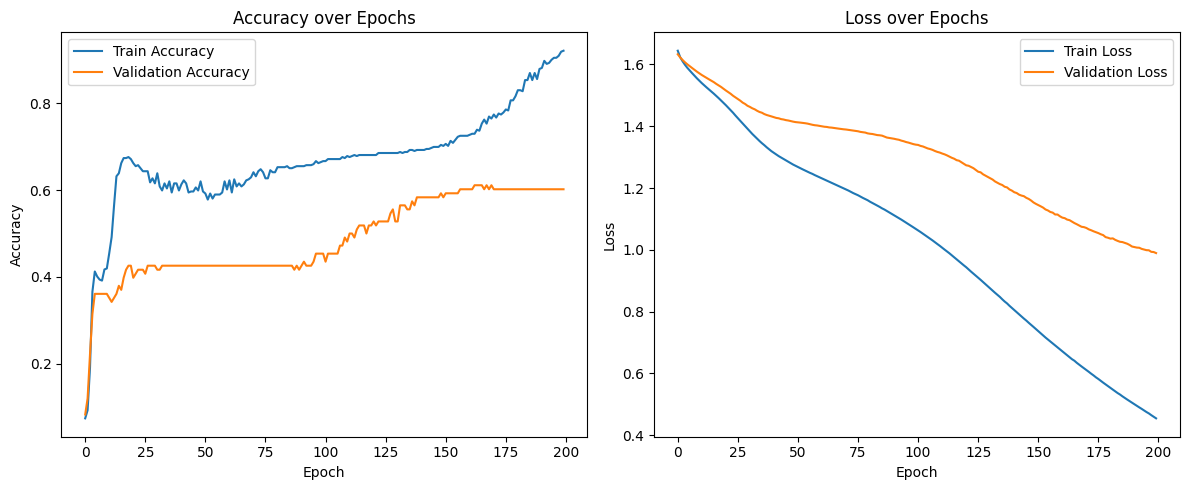

In [28]:
## Your code goes here


plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**1.b.ii)Calculate the accuracy of the model over the test set by retraining the model with the best epoch number from part i.**

In [29]:
## Your code goes here

best_epoch = 175  # becuase validation accuracy is the highest at the given epoch



best_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Conv1D(32, 7, activation='relu'),
    MaxPooling1D(5),
    Conv1D(32, 7, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(y_train_cat.shape[1], activation='softmax')
])


best_model.compile(optimizer=RMSprop(learning_rate=1e-4),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])


best_model.fit(X_train, y_train_cat, epochs=best_epoch, batch_size=128, verbose=1)

# Evaluate on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test_cat, verbose=0)
print(f"✅ Final Test Accuracy (after retraining with {best_epoch} epochs): {test_accuracy:.4f}")


Epoch 1/175
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.3277 - loss: 1.5735
Epoch 2/175
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.3416 - loss: 1.5528
Epoch 3/175
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.3806 - loss: 1.5376
Epoch 4/175
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.4379 - loss: 1.5258
Epoch 5/175
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.4950 - loss: 1.5133
Epoch 6/175
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.5348 - loss: 1.5019
Epoch 7/175
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.5970 - loss: 1.4943
Epoch 8/175
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.6511 - loss: 1.4831
Epoch 9/175
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.6617 - loss: 1.4671
Epoch 10/175
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6495 - loss: 1.4664
Epoch 11/175
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6645 - loss: 1.4555
Epoch 12/175
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.664



**1.c.	Add dropout regularization with a rate of 0.2 right after the MaxPooling1D(5) layer and train the model.
i.	 Select the best number of epochs and calculate the accuracy of the model over the test set by retraining the model with the best epoch number.**

In [31]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Conv1D(32, 7, activation='relu'),
    MaxPooling1D(5),
    Dropout(0.2),
    Conv1D(32, 7, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    X_train, y_train_cat,
    epochs=200,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - accuracy: 0.3674 - loss: 1.6030 - val_accuracy: 0.3611 - val_loss: 1.5945
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.3755 - loss: 1.5882 - val_accuracy: 0.3611 - val_loss: 1.5868
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.3747 - loss: 1.5788 - val_accuracy: 0.3611 - val_loss: 1.5799
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.3783 - loss: 1.5684 - val_accuracy: 0.3611 - val_loss: 1.5736
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.3955 - loss: 1.5557 - val_accuracy: 0.3611 - val_loss: 1.5680
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.3854 - loss: 1.5495 - val_accuracy: 0.3611 - val_loss: 1.5628
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.3822 - loss: 1.5439 - val_accuracy: 0.3611 - val_loss: 1.5573
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.3885 - loss: 1.5324 - val_accuracy: 0.3611 - val_los

In [34]:

# Find best epoch based on val_accuracy
best_epoch = np.argmax(history.history['val_accuracy']) + 1
print(f"Best epoch based on val_accuracy: {best_epoch}")

# Compile
best_model.compile(optimizer=RMSprop(learning_rate=1e-4),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Train with best epoch
best_model.fit(X_train, y_train_cat, epochs=best_epoch, batch_size=128, verbose=1)

# Evaluate
test_loss, test_accuracy = best_model.evaluate(X_test, y_test_cat, verbose=0)
print(f"✅ Test Accuracy after retraining with Dropout and best epoch ({best_epoch}): {test_accuracy:.4f}")

Best epoch based on val_accuracy: 191
Epoch 1/191
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.9093 - loss: 0.3796 
Epoch 2/191
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.9025 - loss: 0.3525
Epoch 3/191
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.9068 - loss: 0.3482
Epoch 4/191
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.9125 - loss: 0.3632
Epoch 5/191
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.9233 - loss: 0.3474
Epoch 6/191
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.9197 - loss: 0.3482
Epoch 7/191
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9226 - loss: 0.3498 
Epoch 8/191
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9172 - loss: 0.3452
Epoch 9/191
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9273 - loss: 0.3424
Epoch 10/191
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9387 - loss: 0.3275
Epoch 11/191
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9404 - loss: 0.3437
Epoch 12/191
5/5 ━━━━━━━━━━━━

**ii.	Compare the accuracy of models from part b and c and observe if regularization affected the performance of the model.**

the accuracy of models from part b was 0.7333 and after regularization the acuracy was 0.7852 so a little bit performance increase duing regularization difference on the accuracy

# Question 2
Data file “final_exam_TS_data.csv” contains 144 rows of one column called Quantity over a specific range of time declared under the column “Month”.






Run the following code to set the convert month column into monthly observations. (The code is already given).

In [ ]:
df = pd.read_csv('final_exam_TS_data.csv')
df = df.rename(columns={'Month':'Date'})
df['month'] = pd.DatetimeIndex(df['Date']).month
df

**2.a)The function for splitting the data into input and output sequences as well as train and test split  is given in the file “CIND850_Final_Starter_Code.ipynb” and is called “split_series”.**

**Using the function for prediction_horizon of 12 and look_back value of 24. Train a stacked GRU with the following specifications:**

**2 GRU layers with 50 and 25 hidden units,‘swish’ activation function, rmsprop optimizer with learning_rate 0.001, and loss function of mse, batch size 128 and number of epochs 200.**


In [ ]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
## Your code goes here

**2.b).  Calculate the average RMSE over n_test_samples = 2. (Note: RMSE formula is given).**



In [ ]:
## Your code goes here